<a href="https://colab.research.google.com/github/bhupendradhami/colab/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd


In [9]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.sample(5)
df.shape

(5572, 5)

## ***Steps***
1. Data Cleaning
2. EDA 
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Deploy

## 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#drop 2,3 & 4 column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True);
df.sample(5)


,v1,v2
5288,ham,An excellent thought by a misundrstud frnd: I ...
4722,ham,HELLO PEACH! MY CAKE TASTS LUSH!
1041,ham,I'm in class. Will holla later
5355,ham,Living is very simple.. Loving is also simple....
2610,ham,"As usual..iam fine, happy &amp; doing well..:)"


In [ ]:
# rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

In [14]:
# ham 0
# spam 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
df.duplicated().sum()

403

In [19]:
# remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2. EDA
    EDA (Exploratory Data Analysis) is a critical step in machine learning that involves analyzing and summarizing the main characteristics of the data to better understand the relationships and patterns within the dataset. EDA helps identify patterns, trends, and relationships between variables, which can then be used to create better machine learning models.

In [22]:
# HAM vs SPAM distribution
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

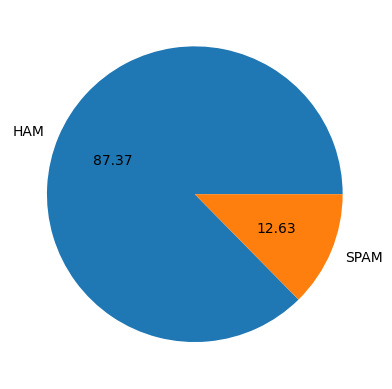

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['HAM','SPAM'],autopct='%0.2f')
plt.show()

In [25]:
# data is imbalance
# we have to balance our data


In [26]:
# find how many alpha, words, sentences or character are used in our data

import nltk  # natural language toolkit
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

NLTK (Natural Language Toolkit) is a Python library that provides a suite of tools and resources for working with natural language data. NLTK is widely used in natural language processing (NLP) and machine learning applications.

Some of the features provided by NLTK include:

    Tokenization: Breaking down text into individual words or sentences.

    Part-of-speech tagging: Labeling each word in a sentence with its grammatical category, such as noun, verb, adjective, etc.

    Named entity recognition: Identifying and labeling named entities in text, such as people, organizations, and locations.

    Sentiment analysis: Analyzing the sentiment or emotion expressed in text.

    Stemming and lemmatization: Reducing words to their base form, such as converting "running" to "run".

    Word frequency analysis: Counting the frequency of each word in a document or corpus.

    Machine learning algorithms for text classification, clustering, and other NLP tasks.





In [34]:
# no of characters
# df.drop(columns=['num_char','num_chars'],inplace=True);

df['num_chars']=df['text'].apply(len)
df.head()

,target,text,num_words,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [35]:
# no of words
df['text'].apply(lambda x:nltk.word_tokenize(x)) # data into array of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 
df.head()

,target,text,num_words,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [38]:
# no of sentence
df['text'].apply(lambda x:nltk.sent_tokenize(x)) # data into array of sentences

df['num_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 
df.head()

,target,text,num_words,num_chars,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [40]:
df[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
# HAM describe
df[df['target']==0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# SPAM describe
df[df['target']==1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

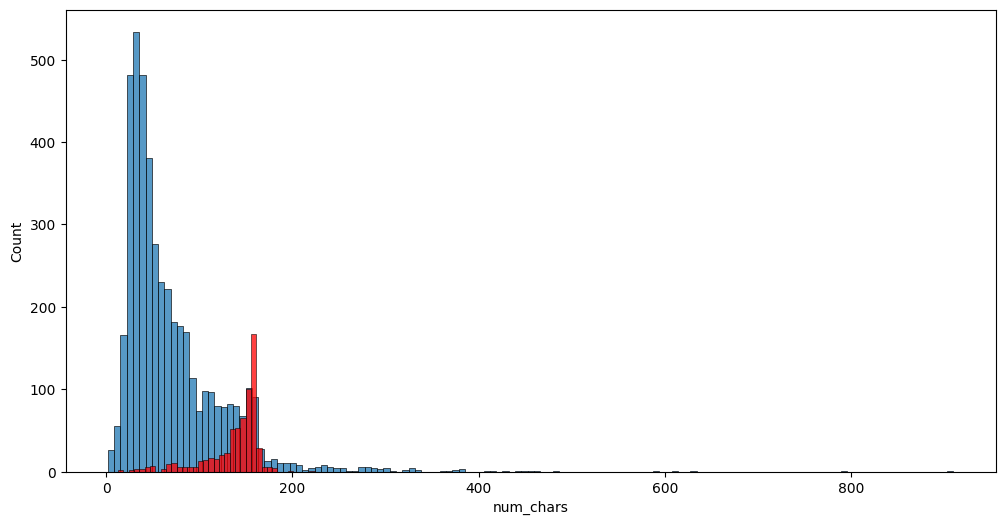

In [48]:
plt.figure(figsize=(12,6))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

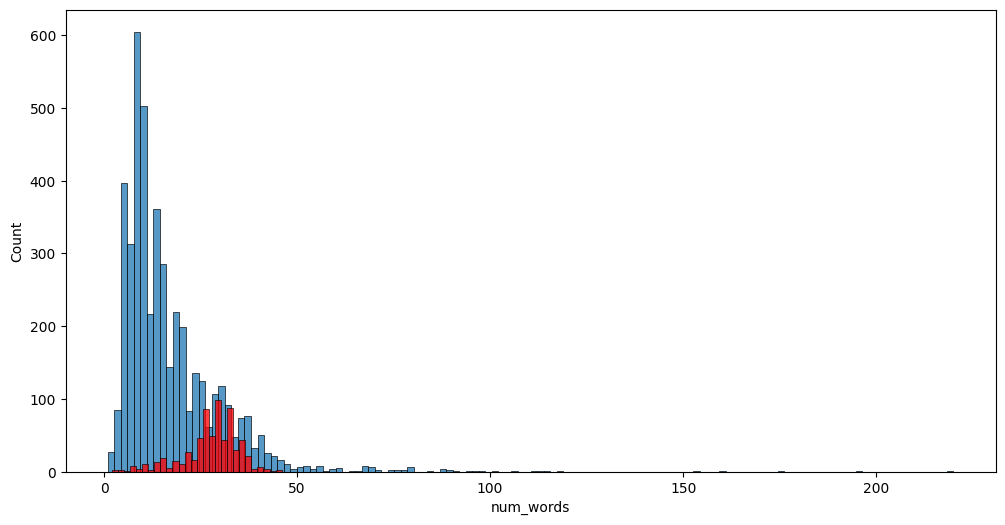

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

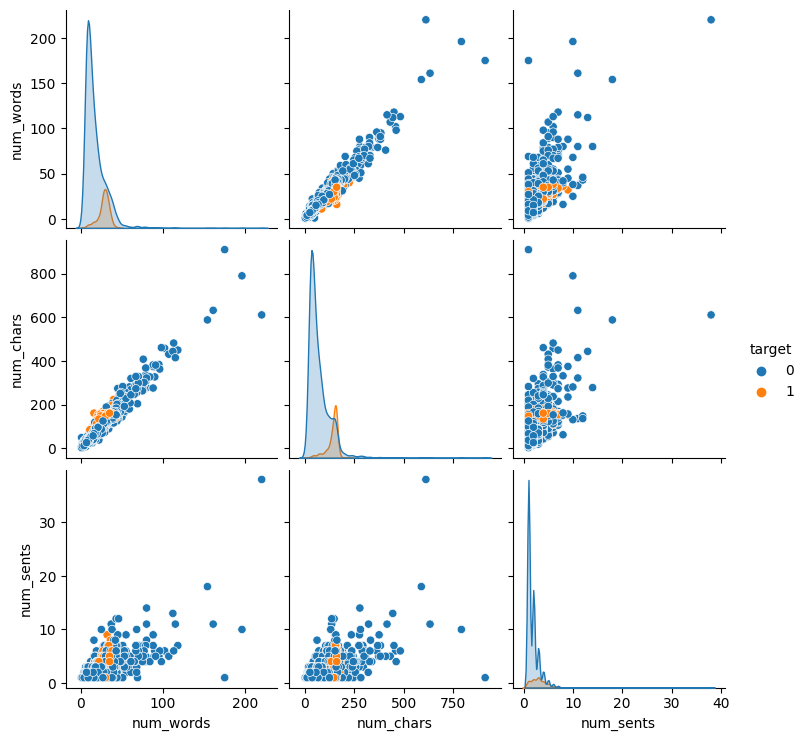

In [51]:
sns.pairplot(df,hue='target')

<ipython-input-53-6a3bbe9be3e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

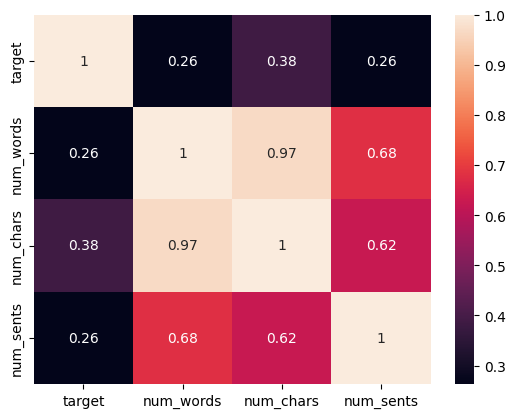

In [53]:
#karl pearson correlation coefficient (r)
sns.heatmap(df.corr(),annot=True)

    3 . Data preprocessing

*   lower case
*   tokenisation 
*   removing special characters
*   removing stop words and punctuations (is, of, the)s w & (,.!?_) pun
*   stemming (dance dancing dacnces === dance)